In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC

In [2]:
def linear(x: np.ndarray) -> np.ndarray:
    return x

In [3]:
df = pd.read_csv(r"/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.drop(columns=['RowNumber',
                 'CustomerId',
                 'Surname'], inplace=True)

In [6]:
df[df['Exited'] == 1].__len__()

2037

In [7]:
df.info()
df['Geography'].unique().__len__()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


3

In [8]:
X = df.drop('Exited', axis=1).copy()
y = df['Exited'].copy()

In [9]:
clmt = ColumnTransformer([('StandardScalar', StandardScaler(), ['CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'Age']),
                          ('Linear', FunctionTransformer(linear), ['NumOfProducts', 'IsActiveMember']),
                          ('OneHotEncoding', OneHotEncoder(), ['Geography', 'Gender'])])
X_enc = clmt.fit_transform(X)
X_enc.shape

(10000, 12)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y)

print(
y_train[y_train == 1].__len__(),
y_train.__len__(),
y_test[y_test == 1].__len__(),
y_test.__len__())

1507 7500 530 2500


In [11]:
reg = LogisticRegression(random_state=69)

In [12]:
reg.fit(X_train, y_train)

LogisticRegression(random_state=69)

In [13]:
y_pred = reg.predict(X_test)

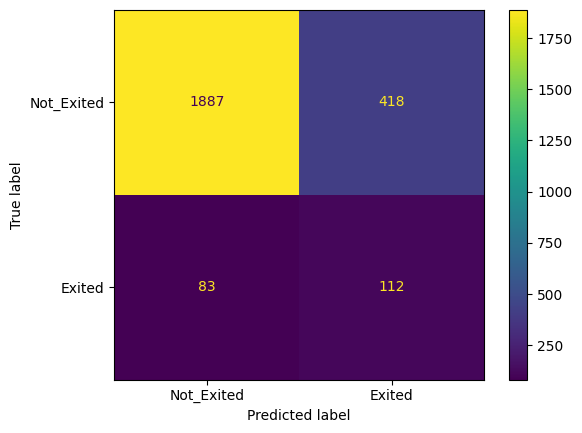

In [14]:
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Not_Exited', 'Exited'])
cmd.plot()

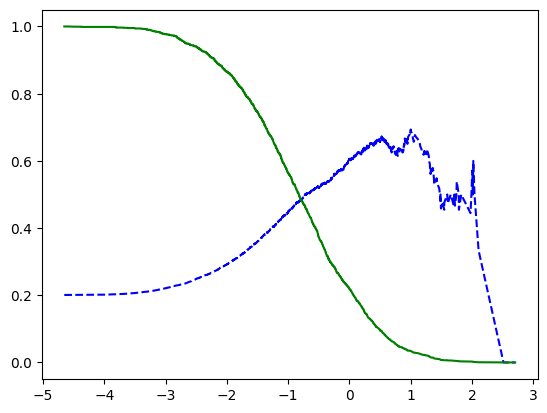

In [15]:
y_scores = cross_val_predict(reg, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 
plt.show()

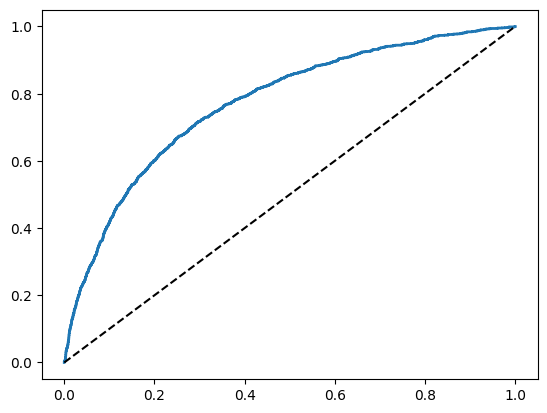

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    
plot_roc_curve(fpr, tpr)
plt.show()

In [17]:
precision_score(y_test, y_pred) 

0.5743589743589743

In [18]:
recall_score(y_test, y_pred) 

0.21132075471698114

In [19]:
from sklearn.svm import LinearSVC  
svm_clf = LinearSVC(C=100,random_state=42)
svm_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, random_state=42)

In [20]:
y_pred_1 = svm_clf.predict(X_test)

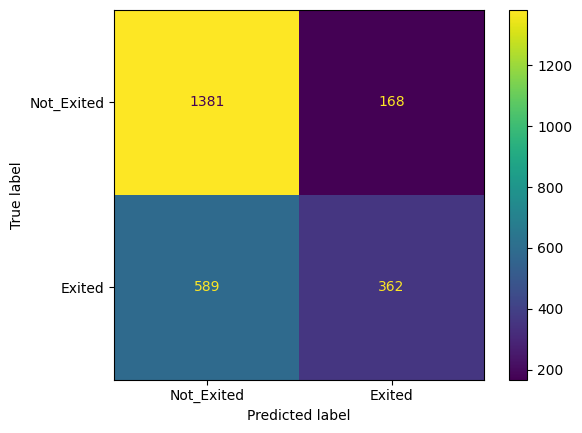

In [21]:
cm_s = confusion_matrix(y_pred_1, y_test)
cmd_s = ConfusionMatrixDisplay(cm_s, display_labels = ['Not_Exited', 'Exited'])
cmd_s.plot()

In [22]:
precision_score(y_test, y_pred_1) 

0.38065194532071506

In [23]:
recall_score(y_test, y_pred_1) 

0.6830188679245283